In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 0)

import missingno as msno

from tqdm import tqdm
tqdm.pandas()

In [2]:
train = pd.read_feather('../input/application_train.ftr')
test = pd.read_feather('../input/application_test.ftr')
buro = pd.read_feather('../input/bureau.ftr')
buro_bal = pd.read_feather('../input/bureau_balance.ftr')
prev = pd.read_feather('../input/previous_application.ftr')
inst = pd.read_feather('../input/installments_payments.ftr')
credit = pd.read_feather('../input/credit_card_balance.ftr')
pos = pd.read_feather('../input/POS_CASH_balance.ftr')

In [77]:
prev = pd.read_feather('../input/previous_application.ftr')
prev = prev.sort_values(['SK_ID_CURR', 'DAYS_DECISION']).reset_index(drop=True)

feature_map = {
    'id': ['SK_ID_PREV', 'SK_ID_CURR'],
    'lin': ['RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'CNT_PAYMENT',
           'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
    'exp': ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'],
    'cat': ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
           'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
           'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
    'bin': ['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL']
}

In [78]:
prev.loc[:, feature_map['cat']] = prev.loc[:, feature_map['cat']].replace({'XAP': np.nan, 'XNA': np.nan})
prev.loc[:, feature_map['lin']] = prev.loc[:, feature_map['lin']].replace({365243: np.nan})
prev.loc[:, feature_map['bin']] = prev.loc[:, feature_map['bin']].replace({'Y': 1, 'N': 0})

In [80]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()
sc = MinMaxScaler(feature_range=(0, 1))

for f in tqdm(feature_map['cat']):
    prev[f] = le.fit_transform(prev[f].astype(str))

for f in tqdm(feature_map['exp']):
    prev[f] = sc.fit_transform(np.log1p(prev[f].fillna(0)).values.reshape(-1, 1))

for f in tqdm(feature_map['lin']):
    prev[f] = sc.fit_transform(prev[f].fillna(prev[f].min()-1).values.astype(float).reshape(-1, 1))

100%|██████████| 10/10 [00:00<00:00, 11.57it/s]


In [82]:
for f in tqdm(feature_map['bin']):
    prev[f] = prev[f].fillna(0)

100%|██████████| 3/3 [00:00<00:00, 45.54it/s]


In [83]:
prev

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1369693,100001,1,0.639862,0.642635,0.639896,0.587995,0.642635,0,5,1,1,0.552166,0.0,0.0,23,0,0.404656,0,7,1,1,19,3,0,4,860,2,0.105882,0,14,0.000000,0.409547,0.251011,0.440097,0.439610,0.0
1,1038818,100002,1,0.705587,0.768074,0.768074,0.133588,0.768074,2,23,1,1,0.500004,0.0,0.0,23,0,0.792879,3,7,3,0,25,3,0,7,1519,0,0.294118,2,16,0.000000,0.805258,0.563861,0.992036,0.994779,0.0
2,2396755,100003,1,0.681087,0.707345,0.706643,0.646292,0.707345,2,7,1,1,0.550034,0.0,0.0,23,0,0.198904,0,7,1,1,7,3,0,4,713,4,0.152941,3,10,0.000000,0.201660,0.158351,0.315097,0.312913,1.0
3,2636178,100003,1,0.855687,0.808325,0.810387,0.133588,0.808325,3,9,1,1,0.500004,0.0,0.0,23,0,0.716878,0,7,1,1,11,3,0,7,346,5,0.082353,3,12,0.000000,0.725009,0.415142,0.776662,0.778281,0.0
4,1810518,100003,0,0.888205,0.870609,0.879538,0.133588,0.870609,0,4,1,1,0.000000,0.0,0.0,23,0,0.744950,3,7,7,2,27,2,2,5,0,10,0.152941,2,7,0.000000,0.753027,0.465421,0.815097,0.817264,1.0
5,1564014,100004,1,0.663381,0.641204,0.629220,0.626088,0.641204,0,19,1,1,0.606007,0.0,0.0,23,0,0.721328,0,7,7,0,19,3,0,6,1117,2,0.058824,3,15,0.000000,0.729505,0.406087,0.750000,0.752175,0.0
6,2495675,100005,1,0.655109,0.679836,0.673142,0.621158,0.679836,4,3,1,1,0.554485,0.0,0.0,23,0,0.741185,0,7,3,0,19,3,0,4,1297,2,0.152941,0,14,0.000000,0.756486,0.467347,0.839335,0.840585,0.0
7,1857999,100005,0,0.000000,0.000000,0.000000,0.133588,0.000000,0,2,1,1,0.000000,0.0,0.0,23,1,0.892503,3,7,3,2,27,4,0,5,0,10,0.000000,4,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,2299329,100006,1,0.603984,0.647734,0.641039,0.591853,0.647734,5,7,1,1,0.554500,0.0,0.0,23,0,0.789113,3,7,3,0,6,3,0,7,1117,3,0.152941,3,12,0.000000,0.812176,0.498363,0.853532,0.855900,0.0
9,1020698,100006,0,0.818606,0.827225,0.830889,0.133588,0.827225,2,4,1,1,0.000000,0.0,0.0,23,0,0.850394,0,7,3,2,27,2,2,5,0,10,0.223529,0,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [102]:
prev.groupby('SK_ID_CURR').tail(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100001,1,0.639862,0.642635,0.639896,0.587995,0.642635,0,5,0.552166,0.0,0.0,23,0,0.404656,0,7,1,1,19,3,0,4,860,2,0.105882,0,14,0.000000,0.409547,0.251011,0.440097,0.439610,0.0
1,100002,1,0.705587,0.768074,0.768074,0.133588,0.768074,2,23,0.500004,0.0,0.0,23,0,0.792879,3,7,3,0,25,3,0,7,1519,0,0.294118,2,16,0.000000,0.805258,0.563861,0.992036,0.994779,0.0
2,100003,1,0.681087,0.707345,0.706643,0.646292,0.707345,2,7,0.550034,0.0,0.0,23,0,0.198904,0,7,1,1,7,3,0,4,713,4,0.152941,3,10,0.000000,0.201660,0.158351,0.315097,0.312913,1.0
3,100003,1,0.855687,0.808325,0.810387,0.133588,0.808325,3,9,0.500004,0.0,0.0,23,0,0.716878,0,7,1,1,11,3,0,7,346,5,0.082353,3,12,0.000000,0.725009,0.415142,0.776662,0.778281,0.0
4,100003,0,0.888205,0.870609,0.879538,0.133588,0.870609,0,4,0.000000,0.0,0.0,23,0,0.744950,3,7,7,2,27,2,2,5,0,10,0.152941,2,7,0.000000,0.753027,0.465421,0.815097,0.817264,1.0
5,100004,1,0.663381,0.641204,0.629220,0.626088,0.641204,0,19,0.606007,0.0,0.0,23,0,0.721328,0,7,7,0,19,3,0,6,1117,2,0.058824,3,15,0.000000,0.729505,0.406087,0.750000,0.752175,0.0
6,100005,1,0.655109,0.679836,0.673142,0.621158,0.679836,4,3,0.554485,0.0,0.0,23,0,0.741185,0,7,3,0,19,3,0,4,1297,2,0.152941,0,14,0.000000,0.756486,0.467347,0.839335,0.840585,0.0
7,100005,0,0.000000,0.000000,0.000000,0.133588,0.000000,0,2,0.000000,0.0,0.0,23,1,0.892503,3,7,3,2,27,4,0,5,0,10,0.000000,4,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
12,100006,2,0.000000,0.000000,0.000000,0.133588,0.000000,4,7,0.000000,0.0,0.0,23,1,0.938377,3,7,3,2,27,4,0,5,0,10,0.000000,4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
13,100006,2,0.734779,0.794155,0.794155,0.133588,0.794155,4,7,0.000000,0.0,0.0,23,0,0.938377,3,7,7,2,27,0,2,5,0,10,0.011765,4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [85]:
from keras.preprocessing.sequence import pad_sequences

In [87]:
prev.drop(['SK_ID_PREV', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

In [91]:
prev.groupby('SK_ID_CURR').NAME_CONTRACT_TYPE.count().mean()

4.928964135313716

In [103]:
from keras.utils import Sequence

In [ ]:
class PrevSequence(Sequence):
    def __init__(train, y, )

In [94]:
df = pd.read_csv('../v7_feat.csv', index_col=0)

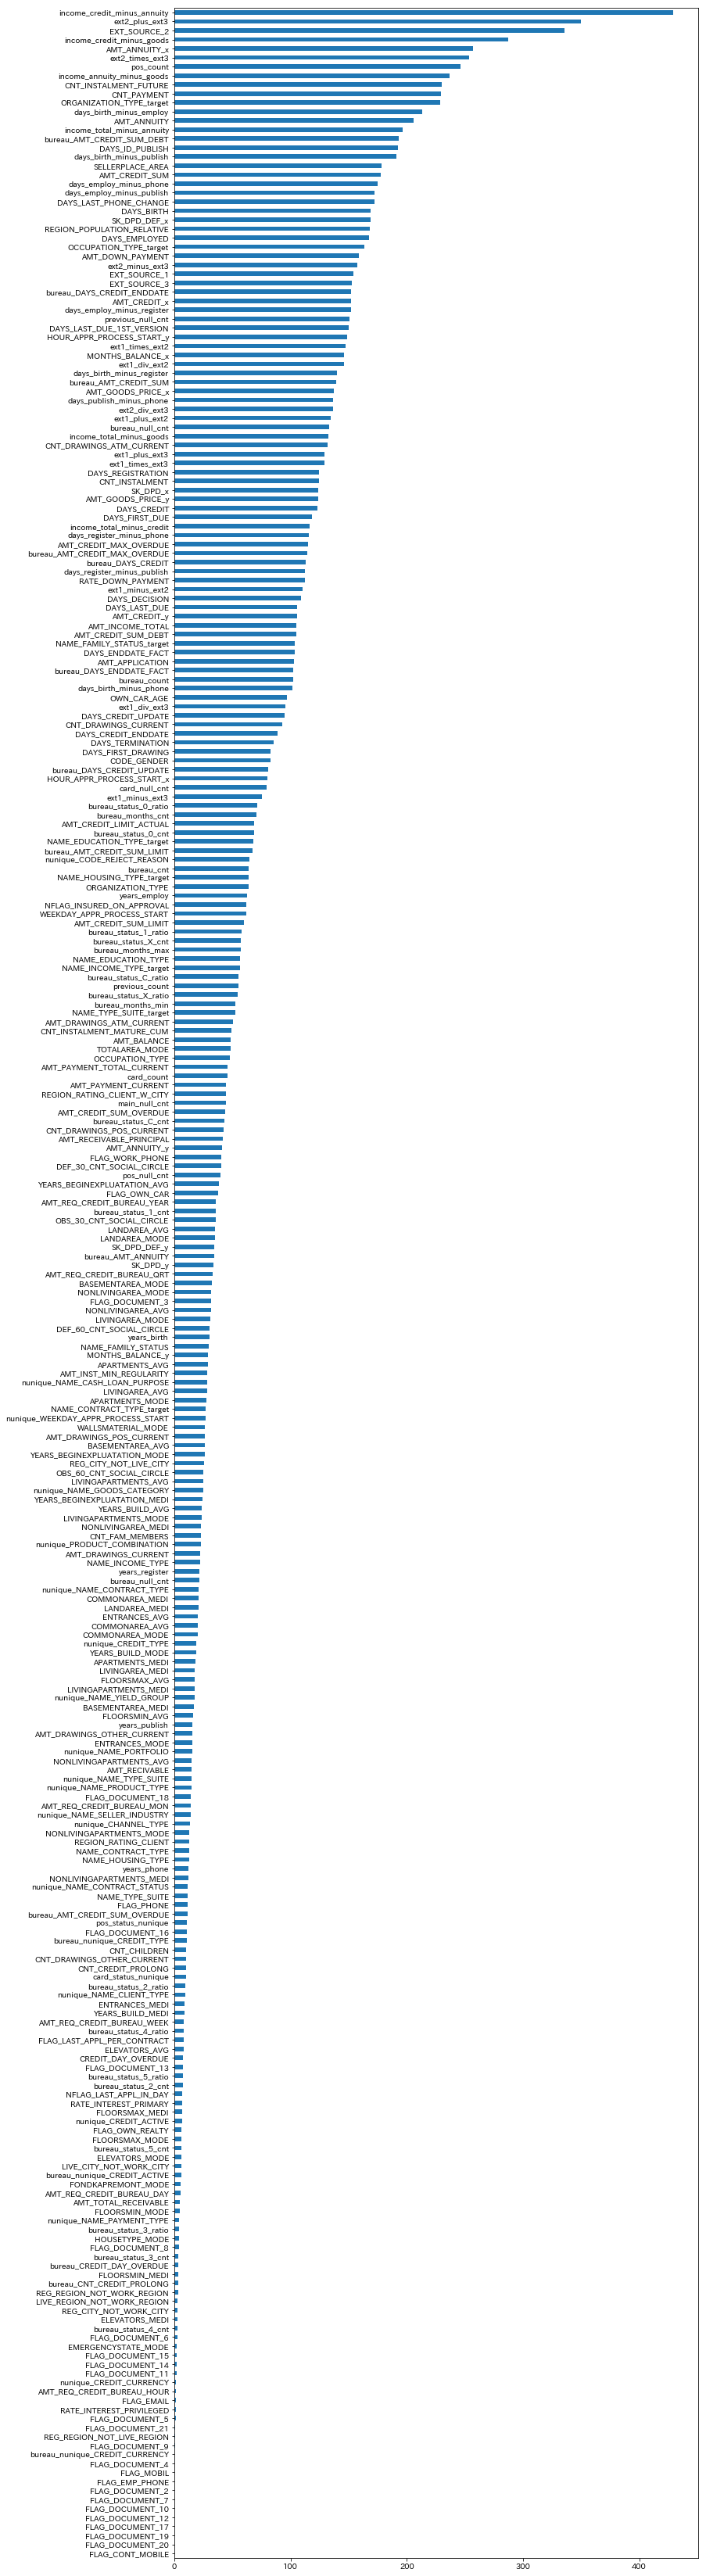

In [108]:
df.mean(axis=1).sort_values().plot.barh(figsize=(12, 60))
plt.savefig('/Users/amane/Dropbox/kaggle/feat.pdf', bbox_inches='tight')
plt.show()